# Regression

L'étude de la regression se fera via le dataset que vous connaissez : house_pricing.  
Nous allons donc prédire le prix de l'immobilier en fonction d'autres indicateurs que nous avons pu récupérer sur ces batiments. 

1. Import des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

2. Import du jeu de données, directement via la bibliothèque sklearn

In [2]:
from sklearn import datasets
#data = datasets.california_housing.fetch_california_housing()
data = sklearn.datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)# 

Affichez votre dataset 

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

Vérifions que nous avons bien une colonne "target" : à savoir la colonne à prédire 

In [7]:
print(data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


De la même manière regardons les variables qui vont être des variables explicatives -aussi appelées Features-, c'est-à-dire qui vont nous aider à prédire la variable de sortie (=target)

In [8]:
data["feature_names"]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

*Question* : qu'avez-vous comme variables qui peuvent faire varier potentiellement le prix ?

4. Transformation du dataset en dataframe pour une meilleure manipulation

In [9]:
dataset = pd.DataFrame(columns=data["feature_names"], data=data.data)
dataset = pd.concat([dataset,pd.DataFrame({"Price":data.target})], axis=1)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


On redéfinit les variables target et feature_names

In [10]:
dataset = pd.DataFrame(data=data.data)
dataset.columns = data.feature_names
dataset["Price"] = data.target
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


6. Créer un nuage de point du prix du salaire médian (MedInc) en fonction du Prix (Price)

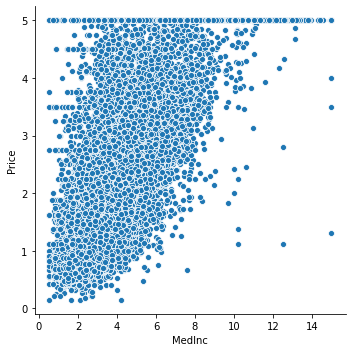

*Question* : Que pouvez-vous dire de ce graphique ?

7. regardez l'influence de l'age sur le prix de la maison avec une courbe

*Question* : que pouvez-vous en dire ?

8. Découper votre dataset en créant deux "sous-datasets" grâce à des sélections de colonnes :   
    - La variable y contient les valeurs de la colonne prix  
    - La variable x contient les autres colonnes

In [15]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
y.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


9. Création du jeu d'entrainement et du jeu de test

Nous devons maintenant découper notre jeu d'entrainement. Pour cela, j'utilise la fonction train_test_split fournie par sklearn. Le paramètre test_size me permet de choisir la proportion de mon jeu de test. En règle général, cette valeur est comprise entre 0.2 et 0.3.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(None, None, None) #Remplacer les None par les bons paramètres

10. effectuer votre régression linéaire   
Pour cela vous devrez utiliser la fonction LinearRegression() ainsi que fit() sur vos données X_train et Y_train 

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression()
regressor.fit(None, None) #Remplacer les None par les bons paramètres

LinearRegression()

11. Utiliser la fonction score() sur votre Regressor pour afficher le score du modèle sur votre train puis sur votre test.   
Rappel : L'objectif est le suivant : avoir la plus petite erreur possible sur le jeu d'entrainement.

In [23]:
regressor.score(None, None) #Remplacer les None par les bons paramètres

0.6061734412057884

In [24]:
regressor.score(None, None) #Remplacer les None par les bons paramètres

0.6059964914401206

*Question* Comment interprêter ce score ? Est-ce que celui-ci vous semble acceptable ?